In [54]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

# Lab 3.03 - Statistical hypothesis testing

## Exercise 1 

The US Navy Recruiting Center knows from the past that recruits' heights are traditionally normally distributed with an average of 69 inches. The recruiting center wants to test whether the average height of this year's recruits exceeds 69 inches. To do this, it takes a random sample of 64 recruits from this year and records their height. The data is in the recruit.csv file.
1. Replace the , by a . in the column Height
2. Formulate the null hypothesis and the alternative hypothesis
3. Calculate the p-value
4. Draw a conclusion based on the previous step and answer the research question.

## Answers

- The p-value is 0.0017%
- There is sufficient reason to reject the H0 hypothesis. The p-value is less than 5%. It is almost impossible that the average height of the recruits would actually be 69 inches with the lengths of this sample.

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/recruten.csv', sep=";")
df.head()

,Recruit,Height
0,1,"74,5"
1,2,74
2,3,"74,6"
3,4,"69,8"
4,5,76


1. Replace the , by a . in the column Height


In [56]:
df['Height'] = df['Height'].str.replace(',', '.').astype(float)

2. Formulate the null hypothesis and the alternative hypothesis


The testing procedure then runs as follows:

**Step 1.** Formulate the hypotheses:

- $H_0: \mu = 69.0$
- $H_1: \mu > 69.0$

**Step 2.** Choose a significance level, e.g. $\alpha = 0.05$

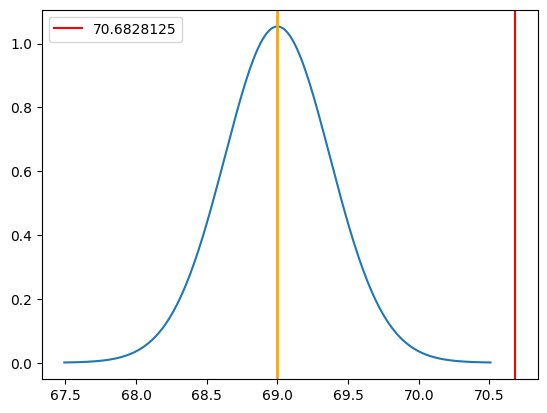

In [57]:


# Properties of the sample:
n = len(df)      # sample size
sm = df["Height"].mean()  # sample mean
s = df["Height"].std()    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 69    # hypothetical population mean (H0)

# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=m0, scale=s/np.sqrt(n), df=n -1)
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red", label=sm)

plt.legend()


**Step 3.** Determine the value of the test statistic, in this case $\overline{x} = 70.68$

**Step 4.** 

<u>Method 1</u>

Determine the $p$-value and reject $H_0$ if $p < \alpha$.  
The $p$-value is the probability, if the null hypothesis is true, to obtain
a value for the test statistic that is at least as extreme as the
observed value


3. Calculate the p-value


In [58]:
p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.00002
p < a: reject H0


In [59]:
g = stats.norm.isf(a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 69.620
sample mean = 70.683 > g = 69.620: reject H0


4. Draw a conclusion based on the previous step and answer the research question.

**Step 5**  
We can conclude that if we assume that  $H_0$  is true, the probability to draw a sample from this population with this particular value for  $\bar{x}$  is very small indeed. With the chosen significance level, we can reject the null hypothesis.

## Exercise 2

The amount of rainfall on a certain island over the past 30 years has followed a normal distribution with mean 82.3 cm per year, and standard deviation 15.3. Scientists suspect that global warming has now increased the mean. A hypothesis test, of 5% level of significance is to be carried out to test the suspicion. The average rainfall on the island over the next 5 years will be used for the test.

1. Find the region of rejection for the test
2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

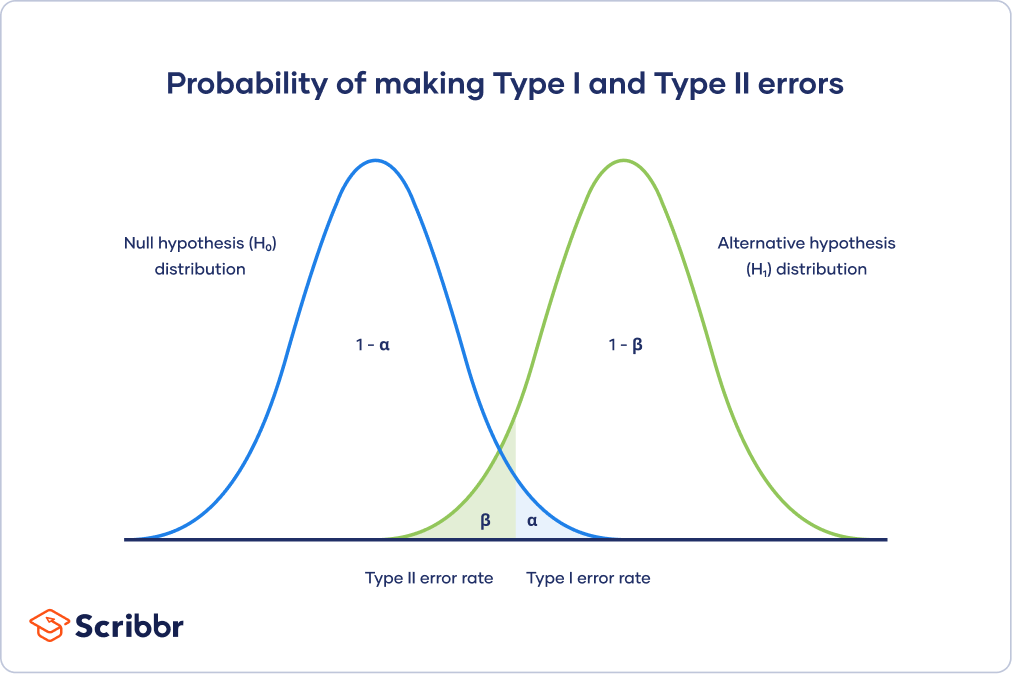




The testing procedure then runs as follows:

**Step 1.1.** Formulate the hypotheses:

- $H_0: \mu = 20.0$
- $H_1: \mu > 20.0$

**Step 1.2.** Choose a significance level, e.g. $\alpha = 0.05$

In [60]:
# Properties of the sample:
n = 5      # sample size
#sm = 20.2  # sample mean
s = 15.3    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 82.3    # hypothetical population mean (H0)

In [61]:
g = stats.norm.isf(a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
 

Critical value g ≃ 93.555


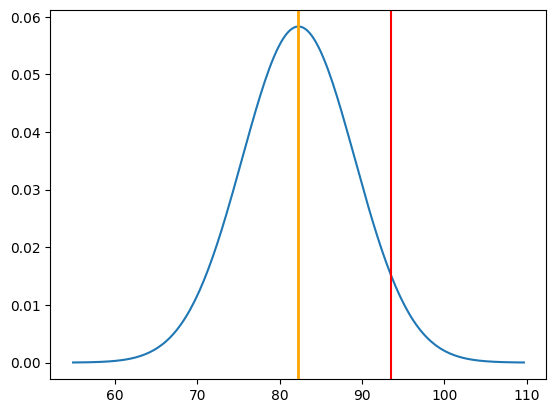

In [62]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n)) 
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
plt.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
plt.axvline(g, color="red")

 

2. What is the probability of making a Type I error?
3. Find the probability of making a Type II error if the mean rainfall on the island has actually increased to 105 cm per year.

In [63]:
# kans is 5 % (alpha = 5%)

Critical value g ≃ 93.555
0.047192073697960024


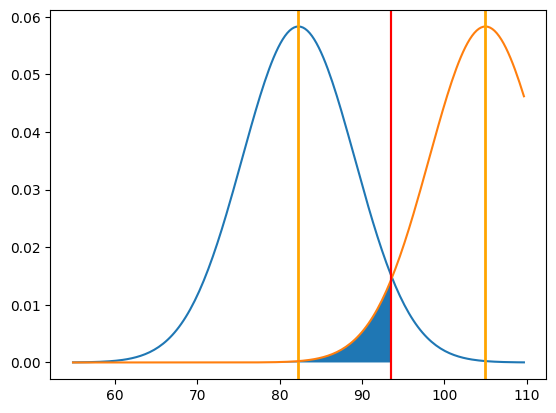

In [64]:
# Properties of the sample:
n = 5      # sample size
#sm = 20.2  # sample mean
s = 15.3    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 82.3     # hypothetical population mean (H0)

g = stats.norm.isf(a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)

# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n)) 
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
plt.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
plt.axvline(g, color="red")

# Properties of the sample:
n = 5      # sample size
#sm = 20.2  # sample mean
s = 15.3    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 105    # hypothetical population mean (H0)
 
# Gauss-curve plot:
# X-values
#dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
 
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
plt.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
plt.axvline(g, color="red")
  
plt.fill_between(dist_x, 0 ,dist_y, where=(dist_x < g))
print(stats.norm.cdf(g, loc=m0, scale=s/np.sqrt(n)))

## Answers

1. Region of rejection: rainfall >= 93.555
2. Because the normal distribution is continuous, the probability of a Type I error for a 5% test is always 5%.
3. If X $\sim$ Nor(105, 15.3) => P($\bar{X}$ < 93.6) = 0.048

## Exercise 3

In the past, the time, in minutes for a particular minor medical procedure has been found to have mean 34.2 minutes and standard deviation 2.6. A new method is being considered in the hope that the average time would be shorter. A random sample of 50 procedures using the new method is taken and the mean time is found to be 33.5 minutes.  
Carry out a test at the 5% level of significance to see whether the mean time for the procedure has decreased.

## Answers
- p-value: 0.02847 => p < a: reject H0
- Critical value g ≃ 33.595 => sample mean = 33.500 < g = 33.595: reject H0

In [65]:
# Properties of the sample:
n = 50      # sample size
sm = 33.5  # sample mean
s = 2.6    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 34.2    # hypothetical population mean (H0)

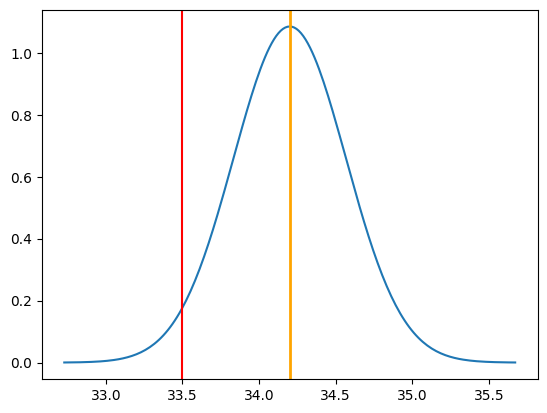

In [66]:
# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.norm.pdf(dist_x, m0, s/np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot the Gauss-curve
dplot.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
dplot.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
dplot.axvline(sm, color="red")

In [67]:
p = stats.norm.cdf(sm, loc=m0, scale=s/np.sqrt(n))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

p-value: 0.02847
p < a: reject H0


In [68]:
g = stats.norm.ppf(a, loc = m0, scale = s / np.sqrt(n))
print("Critical value g ≃ %.3f" % g)
if (sm > g):
    print("sample mean = %.3f > g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f < g = %.3f: reject H0" % (sm, g))

Critical value g ≃ 33.595
sample mean = 33.500 < g = 33.595: reject H0


### Exercise 4

A certain variety of bush grows to heights which are normally distributed with mean 74.0 cm. A new fertiliser is introduced in the hope that this will increase the heights. The nursery owner records the heights of a large random sample of _n_ bushes, and calculates that $\bar{x} = 75.2$ and $s = 5.3$.  
1. She consults a friend who is a statistician as to whether or not there is evidence that the heights have increased. The friend calculates the test statistic, $z$, has a value of 1.867. Calculate the value of $n$.
2. Using this value of the test statistic, carry out the test at the 5% level of significance. 



p-value: 0.03313
p < a: reject H0
Critical value g ≃ 75.072
sample mean = 75.200 > g = 75.072: reject H0


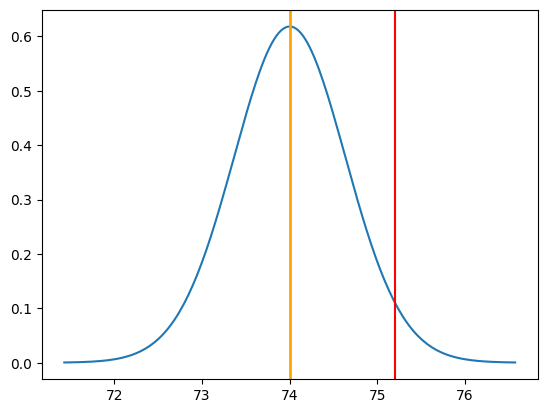

In [71]:
import math
# Properties of the sample:
sm = 75.2  # sample mean
s = 5.3    # population standard deviation (assumed to be known)
a = 0.05    # significance level (chosen by the researcher)
m0 = 74.0    # hypothetical population mean (H0)
z = 1.867
n = round(((s * z / (sm - m0))**2), 2)      # sample size

# Gauss-curve plot:
# X-values
dist_x = np.linspace(m0 - 4 * s/np.sqrt(n), m0 + 4 * s/np.sqrt(n), num=201)
# Y-values for the Gauss curve
dist_y = stats.t.pdf(dist_x, loc=m0, scale=s/np.sqrt(n), df=n-1) 
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)
# Show the hypothetical population mean with an orange line
plt.axvline(m0, color="orange", lw=2)
# Show the sample mean with a red line
plt.axvline(sm, color="red") 

p = stats.t.sf(sm, loc=m0, scale=s/np.sqrt(n), df=n-1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")
    
g = stats.t.isf(a, loc = m0, scale = s / np.sqrt(n), df=n-1)
print("Critical value g ≃ %.3f" % g)
if (sm < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (sm, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (sm, g))

## Answers are wrong
1. $z = {{\bar{x} - \mu}\over{{s}\over{\sqrt{n}}}}$ => n = 68
2. p-value: 0.03095 => p < a: reject H0  
Critical value g ≃ 75.057   
sample mean = 75.200 > g = 75.057: reject H0